<a href="https://colab.research.google.com/github/haitaohuang/ml/blob/master/mnist_low_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [21]:
md=input_data.read_data_sets(train_dir='.', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [22]:
type(md)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [23]:
md.train.images.shape

(55000, 784)

In [24]:
md.train.num_examples

55000

In [25]:
md.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
md.train.images[1].shape

(784,)

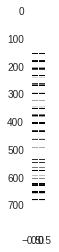

In [28]:
plt.imshow(md.train.images[1].reshape(784,1), aspect=0.02)

In [0]:
x=tf.placeholder(tf.float32, shape=[None, 784])

In [0]:
w=tf.Variable(tf.zeros([784,10]))

In [0]:
b=tf.Variable(tf.zeros([10]))

In [0]:
y=tf.matmul(x,w)+b

In [0]:
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [34]:
md.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train=optimizer.minimize(cross_entropy)

In [0]:
init=tf.global_variables_initializer()

In [40]:
with tf.Session() as s:
  s.run(init)
  for step in range(1000):
    batch_x,batch_y = md.train.next_batch(100)
    s.run(train, feed_dict={x:batch_x,y_true:batch_y} )
  matches=tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
  acc = tf.reduce_mean(tf.cast(matches,tf.float32))
  print(s.run(acc,feed_dict={x:md.test.images,y_true:md.test.labels}))

0.9168
